In [ ]:
import json


with open("/content/depth_anything_metrics.json", "r") as f:
  da_data = json.load(f)

with open("/content/glpn_metrics.json", "r") as f:
  glpn_data = json.load(f)

with open("/content/lap_depth_metrics.json", "r") as f:
  ld_data = json.load(f)

with open("/content/pixel_former_metrics.json", "r") as f:
  pf_data = json.load(f)

with open("/content/zoedepth_metrics.json", "r") as f:
  zd_data = json.load(f)



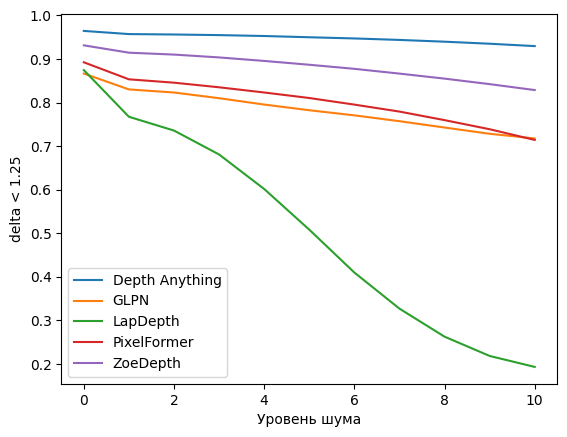

In [ ]:
import matplotlib.pyplot as plt

def f(data):
  denom = data[0]
  for i in range(len(data)):
    data[i] /= denom

  return data


da_rmse = [x['delta1'] for x in da_data]
glpn_rmse = [x['delta1'] for x in glpn_data]
ld_rmse = [x['delta1'] for x in ld_data]
pf_rmse = [x['delta1'] for x in pf_data]
zd_rmse = [x['delta1'] for x in zd_data]

plt.xlabel("Уровень шума")
plt.ylabel("delta < 1.25")

plt.plot(list(range(11)), da_rmse, label="Depth Anything")
plt.plot(list(range(11)), glpn_rmse, label="GLPN")
plt.plot(list(range(11)), ld_rmse, label="LapDepth")
plt.plot(list(range(11)), pf_rmse, label="PixelFormer")
plt.plot(list(range(11)), zd_rmse, label="ZoeDepth")
plt.legend()




In [ ]:
print(f(da_rmse))

[0.01, 0.2881458276276511, 0.29127975307489107, 0.29553920074925527, 0.30046163576396046, 0.3056676874766681, 0.3114951772387613, 0.31838377727339284, 0.326295722935305, 0.3350973947577959, 0.34503783585408027]


In [ ]:
0.01 / 0.01

1.0

In [ ]:
for row in data:
  print("rmse: {0} mae: {1} mre: {2} gradient: {3} rank: {4} census: {5} delta1: {6} delta2: {7} delta3: {8}".format(round(row['rmse'], 3), round(row['mae'], 3), round(row['mre'], 3), round(row['gradient'], 3), round(row['rank'], 3), round(row['census'], 3), round(row['delta1'], 3), round(row['delta2'], 3), round(row['delta3'], 3)))

rmse: 0.28 mae: 0.187 mre: 0.069 gradient: 0.17 rank: 2.753 census: 5.854 delta1: 0.964 delta2: 0.992 delta3: 0.998

rmse: 0.288 mae: 0.192 mre: 0.069 gradient: 0.17 rank: 2.748 census: 5.909 delta1: 0.957 delta2: 0.991 delta3: 0.997

rmse: 0.291 mae: 0.194 mre: 0.07 gradient: 0.17 rank: 2.746 census: 5.929 delta1: 0.956 delta2: 0.991 delta3: 0.997

rmse: 0.296 mae: 0.198 mre: 0.071 gradient: 0.17 rank: 2.743 census: 5.954 delta1: 0.955 delta2: 0.99 delta3: 0.997

rmse: 0.3 mae: 0.202 mre: 0.073 gradient: 0.17 rank: 2.74 census: 5.978 delta1: 0.953 delta2: 0.99 delta3: 0.997

rmse: 0.306 mae: 0.206 mre: 0.074 gradient: 0.17 rank: 2.737 census: 6.004 delta1: 0.95 delta2: 0.99 delta3: 0.997

rmse: 0.311 mae: 0.211 mre: 0.076 gradient: 0.17 rank: 2.733 census: 6.032 delta1: 0.947 delta2: 0.99 delta3: 0.997

rmse: 0.318 mae: 0.216 mre: 0.078 gradient: 0.171 rank: 2.729 census: 6.063 delta1: 0.944 delta2: 0.99 delta3: 0.997

rmse: 0.326 mae: 0.222 mre: 0.08 gradient: 0.171 rank: 2.725 censu

In [ ]:
round(3.90855, 3)

3.909

In [ ]:
import matplotlib.pyplot as plt

rmse = list()
for row in data:
  rmse.append(row['rmse'])

#plt.title("RMSE")
plt.xlabel("Уровень шума")
plt.ylabel("RMSE")
plt.plot

In [ ]:
print_data(zoedepth)

NameError: name 'print_data' is not defined

In [ ]:
!unzip /content/drive/MyDrive/nyu_dataset/official.zip -d /content/test

Archive:  /content/drive/MyDrive/nyu_dataset/official.zip

   creating: /content/test/official/

  inflating: /content/test/official/depth_00001.png  

  inflating: /content/test/official/depth_00002.png  

  inflating: /content/test/official/depth_00009.png  

  inflating: /content/test/official/depth_00014.png  

  inflating: /content/test/official/depth_00015.png  

  inflating: /content/test/official/depth_00016.png  

  inflating: /content/test/official/depth_00017.png  

  inflating: /content/test/official/depth_00018.png  

  inflating: /content/test/official/depth_00021.png  

  inflating: /content/test/official/depth_00028.png  

  inflating: /content/test/official/depth_00029.png  

  inflating: /content/test/official/depth_00030.png  

  inflating: /content/test/official/depth_00031.png  

  inflating: /content/test/official/depth_00032.png  

  inflating: /content/test/official/depth_00033.png  

  inflating: /content/test/official/depth_00034.png  

  inflating: /content/t

In [ ]:
%%writefile /content/LapDepth-release/metrics.py

import scipy.signal as sps
import numpy as np

def evaluate_model(inference):
    test_path = "/content/test/official"
    cnt_test = len(os.listdir(test_path))
    index = 0
    metrics = list()
    for filename in tqdm(os.listdir(test_path)):
        if "colors" not in filename:
            continue
        image = Image.open(os.path.join(test_path, filename))
        depth = inference(image)

        depth_filename = filename.replace("colors", "depth")
        image = Image.open(os.path.join(test_path, depth_filename))
        ground_truth_depth = np.asarray(image)

        ground_truth_depth = 1 / ground_truth_depth
        ground_truth_depth = ground_truth_depth / ground_truth_depth.max()

        metrics_values = get_metrics(depth, ground_truth_depth)
        metrics.append(metrics_values)

    result = dict()
    for k, v in metrics[0].items():
        result[k] = sum([x[k] for x in metrics]) / cnt_test
    return result


def get_metrics(x, y, size=5):
    x = x[np.newaxis, ...]
    y = y[:, 42:474, 40:616]
    x[y == 0] = 0

    values = dict()
    values['rmse'] = np.sum(rmse(x, y))
    values['mae'] = np.sum(mae(x, y))
    values['mre'] = np.sum(mre(x, y))
    values['gradient'] = np.sum(gradient_metric(x, y))
    values['rank'], values['census'] = rank_and_census(x, y, size)
    values['rank'] = np.sum(values['rank'])
    values['census'] = np.sum(values['census'])
    values['delta1'] = np.sum(get_delta(x, y, 1.25))
    values['delta2'] = np.sum(get_delta(x, y, 1.25 ** 2))
    values['delta3'] = np.sum(get_delta(x, y, 1.25 ** 3))

    return values

def get_delta(x, y, delta):
    frac1, frac2 = x / (y + 1e-6), y / (x + 1e-6)
    frac1, frac2 = frac1[..., np.newaxis], frac2[..., np.newaxis]
    frac = np.concatenate((frac1, frac2), axis=-1)

    delta_values = np.max(frac, axis=-1)
    return np.sum((delta_values < delta), axis=(1, 2)) / (x.shape[1] * x.shape[2])


def rmse(x, y):
    return np.sqrt(np.sum((x - y) ** 2, axis=(1, 2)) / (x.shape[1] * x.shape[2]))

def mae(x, y):
    return np.sum(np.abs(x - y), axis=(1, 2)) / (x.shape[1] * x.shape[2])

def mre(x, y):
    return np.sum(np.abs(x - y) / (y + 1e-7), axis=(1, 2)) / (x.shape[1] * x.shape[2])

def convolution(image, conv):
    height, width = image.shape[0], image.shape[1]
    padding_width = conv.shape[0] // 2
    image = np.pad(image, padding_width, 'constant')
    result = np.zeros((height, width))
    for i in range(padding_width, height + padding_width):
        for j in range(padding_width, width + padding_width):
            result[i-padding_width][j-padding_width] = np.sum(image[(i - padding_width):(i + padding_width + 1), (j - padding_width):(j + padding_width + 1)] * conv)
    return result

def gradient_metric(x, y):
    kernel1 = np.array([[
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1],
    ]])

    kernel2 = np.array([[
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1],
    ]])

    x_deriv1, y_deriv1 = sps.fftconvolve(x, kernel1, mode='same'), sps.fftconvolve(y, kernel1, mode='same')
    x_deriv2, y_deriv2 = sps.fftconvolve(x, kernel2, mode='same'), sps.fftconvolve(y, kernel2, mode='same')

    return np.sum(np.abs(x_deriv1 - y_deriv1) + np.abs(x_deriv2 - y_deriv2), axis=(1, 2)) / (x.shape[1] * x.shape[2])

def neighborhood(x, size=5):
    indices = np.indices(x.shape[1:])
    padding_width = size // 2
    indices += padding_width
    pad_x = np.pad(x, ((0,), (padding_width,), (padding_width,)), 'constant')

    index_maps = list()
    for i in range(-padding_width, padding_width+1):
        for j in range(-padding_width, padding_width+1):
            index_map = np.zeros(indices.shape).astype(int)
            index_map[0] = indices[0] + i
            index_map[1] = indices[1] + j
            index_maps.append(index_map)

    index_maps = np.array(index_maps)
    return pad_x[:, index_maps[:, 0, :, :], index_maps[:, 1, :, :]]

def one_hot(x, size):
    center_index = size ** 2 // 2
    center = x[:, center_index]
    center = center[:, np.newaxis]

    encoding = (x < center).astype(int)
    return np.delete(encoding, center_index, axis=1)

def rank_metric(en_x, en_y, size=5):
    rank_x, rank_y = np.sum(en_x, axis=1), np.sum(en_y, axis=1)
    return np.sum(np.abs(rank_x - rank_y), axis=(1, 2)) / (en_x.shape[2] * en_x.shape[3])

def census_metric(en_x, en_y, size=5):
    mask = (en_x != en_y).astype(int)
    return np.sum(mask, axis=(1, 2, 3)) / (en_x.shape[2] * en_x.shape[3])

def rank_and_census(x, y, size=5):
    nx, ny = neighborhood(x, size), neighborhood(y, size)
    en_x, en_y = one_hot(nx, size), one_hot(ny, size)
    rank, census = rank_metric(en_x, en_y, size), census_metric(en_x, en_y, size)
    return rank, census

Overwriting /content/LapDepth-release/metrics.py


In [20]:
%cd /kaggle/working

/kaggle/working


## LapDepth

In [21]:

!git clone https://github.com/tjqansthd/LapDepth-release.git
# change directory to LapDepth soruce
%cd LapDepth-release
!ls

Cloning into 'LapDepth-release'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 134 (delta 27), reused 18 (delta 18), pack-reused 98
Receiving objects: 100% (134/134), 25.24 MiB | 23.76 MiB/s, done.
Resolving deltas: 100% (52/52), done.
/kaggle/working/LapDepth-release
LICENSE		     datasets  logger.py  trainer.py
LapDepth_demo.ipynb  demo.py   model.py   transform_list.py
README.md	     eval.py   option.py  utils.py
calculate_error.py   example   train.py


In [17]:
# install requirement package
!pip install geffnet
!pip install path
!pip install IPython
!pip install blessings
!pip install progressbar

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=fabf95efe2481338edcc0de1ffc89596078e98942f3dd9570b21bb9e44615682
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built progressbar


In [ ]:
!mkdir /content/demo
!mkdir /content/noise

In [22]:
%%writefile /kaggle/working/LapDepth-release/demo.py
import torch
import numpy as np
from model import LDRN
import glob
import torch.backends.cudnn as cudnn
from PIL import Image
from torchvision import transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import argparse
import os, sys
import imageio
import time

parser = argparse.ArgumentParser(description='Laplacian Depth Residual Network training on KITTI',formatter_class=argparse.ArgumentDefaultsHelpFormatter)

# Directory setting 

parser.add_argument('--model_dir',type=str, default = '')
parser.add_argument('--img_dir', type=str, default = None)
parser.add_argument('--img_folder_dir', type=str, default= None)

# Dataloader setting
parser.add_argument('--seed', default=0, type=int, help='seed for random functions, and network initialization')

# Model setting
parser.add_argument('--encoder', type=str, default = "ResNext101")
parser.add_argument('--pretrained', type=str, default = "KITTI")
parser.add_argument('--norm', type=str, default = "BN")
parser.add_argument('--n_Group', type=int, default = 32)
parser.add_argument('--reduction', type=int, default = 16)
parser.add_argument('--act', type=str, default = "ReLU")
parser.add_argument('--max_depth', default=80.0, type=float, metavar='MaxVal', help='max value of depth')
parser.add_argument('--lv6', action='store_true', help='use lv6 Laplacian decoder')

# GPU setting
parser.add_argument('--cuda', action='store_true')
parser.add_argument('--gpu_num', type=str, default = "0,1,2,3", help='force available gpu index')
parser.add_argument('--rank', type=int,   help='node rank for distributed training', default=0)


args = parser.parse_args()

assert (args.img_dir is not None) or (args.img_folder_dir is not None), "Expected name of input image file or folder"

if args.cuda and torch.cuda.is_available():
    os.environ["CUDA_VISIBLE_DEVICES"]= args.gpu_num
    cudnn.benchmark = True
    print('=> on CUDA')
else:
    print('=> on CPU')

if args.pretrained == 'KITTI':
    args.max_depth = 80.0
elif args.pretrained == 'NYU':
    args.max_depth = 10.0

print('=> loading model..')
Model = LDRN(args)
if args.cuda and torch.cuda.is_available():
    Model = Model.cuda()
Model = torch.nn.DataParallel(Model)
assert (args.model_dir != ''), "Expected pretrained model directory"
Model.load_state_dict(torch.load(args.model_dir))
Model.eval()

if args.img_dir is not None:
    if args.img_dir[-1] == '/':
        args.img_dir = args.img_dir[:-1]
    img_list = [args.img_dir]
    result_filelist = ['./out_' + args.img_dir.split('/')[-1]]
elif args.img_folder_dir is not None:
    if args.img_folder_dir[-1] == '/':
        args.img_folder_dir = args.img_folder_dir[:-1]
    png_img_list = glob.glob(args.img_folder_dir + '/*.png')
    jpg_img_list = glob.glob(args.img_folder_dir + '/*.jpg')
    img_list = png_img_list + jpg_img_list
    img_list = sorted(img_list)
    result_folder = './out_' + args.img_folder_dir.split('/')[-1]
    if not os.path.exists(result_folder):
        os.makedirs(result_folder)
    result_filelist = []
    for file in img_list:
        result_filename = result_folder + '/out_' + file.split('/')[-1]
        result_filelist.append(result_filename)

print("=> process..")
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

for i, img_file in enumerate(img_list):
    img = Image.open(img_file)
    img = np.asarray(img, dtype=np.float32)/255.0
    if img.ndim == 2:
        img = np.expand_dims(img,2)
        img = np.repeat(img,3,2)
    img = img.transpose((2, 0, 1))
    img = torch.from_numpy(img).float()
    img = normalize(img)
    if args.cuda and torch.cuda.is_available():
        img = img.cuda()
    
    _, org_h, org_w = img.shape

    # new height and width setting which can be divided by 16
    img = img.unsqueeze(0)

    if args.pretrained == 'KITTI':
        new_h = 352
        new_w = org_w * (352.0/org_h)
        new_w = int((new_w//16)*16)
        img = F.interpolate(img, (new_h, new_w), mode='bilinear')
    elif args.pretrained == 'NYU':
        new_h = 432
        new_w = org_w * (432.0/org_h)
        new_w = int((new_w//16)*16)
        img = F.interpolate(img, (new_h, new_w), mode='bilinear')

    # depth prediction
    #with torch.no_grad():
    #    _, out = Model(img)

    img_flip = torch.flip(img,[3])
    with torch.no_grad():
        times = list()
        for i in range(200):
            start = time.time()
            _, out = Model(img)
            times.append(time.time() - start)
            
        print(sum(times) / len(times))
        sys.exit(0)
        _, out_flip = Model(img_flip)
        out_flip = torch.flip(out_flip,[3])
        out = 0.5*(out + out_flip)

    if new_h > org_h:
        out = F.interpolate(out, (org_h, org_w), mode='bilinear')
    out = out[0,0]
    
    if args.pretrained == 'KITTI':
        out = out[int(out.shape[0]*0.18):,:]
        out = out*256.0
    elif args.pretrained == 'NYU':
        out = out*1000.0
    out = out.cpu().detach().numpy().astype(np.uint16)
    out = (out/out.max())*255.0
    result_filename = result_filelist[i]
    plt.imsave(result_filename ,np.log10(out), cmap='plasma_r')
    if (i+1)%10 == 0:
        print("=>",i+1,"th image is processed..")

print("=> Done.")



Overwriting /kaggle/working/LapDepth-release/demo.py


In [ ]:
# test the model pretrained on NYU Depth V2 dataset
# pre-trained model  : LDRN_NYU_ResNext101_pretrained_data.pkl
!python demo.py --model_dir /kaggle/input/lap/pytorch/1/1/lap.pkl --img_dir /kaggle/input/nyuv2-official-split-dataset/test/official/rgb_00001.png  --pretrained NYU --cuda --gpu_num 0


=> on CUDA
=> loading model..
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt101_32X8D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt101_32X8D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth" to /root/.cache/torch/hub/checkpoints/resnext101_32x8d-8ba56ff5.pth
100%|████████████████████████████████████████| 340M/340M [00:10<00:00, 34.8MB/s]
==> Norm: BN
=> process..


In [ ]:
import json

metrics = list()
metrics.append({'rmse': 0.436119393908109, 'mae': 0.305319006075379, 'mre': 0.11296630978960852, 'gradient': 0.1854892680165214, 'rank': 2.9612055720042694, 'census': 7.019201519898527, 'delta1': 0.8745071346419151, 'delta2': 0.9755901836376497, 'delta3': 0.9931951066207007})
metrics.append({'rmse': 0.5994804167581742, 'mae': 0.4348270664012738, 'mre': 0.14874783311887715, 'gradient': 0.19108871973612832, 'rank': 3.8662153126809025, 'census': 7.973182549851503, 'delta1': 0.767380486034422, 'delta2': 0.9398595436656817, 'delta3': 0.9830722591605481})
metrics.append({'rmse': 0.6406321301688547, 'mae': 0.4692863728706919, 'mre': 0.15898483203780361, 'gradient': 0.19440801446888065, 'rank': 4.044053555213016, 'census': 8.20951621142172, 'delta1': 0.7356990637014545, 'delta2': 0.9285373067251538, 'delta3': 0.978715605178957})

metrics.append({'rmse': 0.7116824950181957, 'mae': 0.5290806323462022, 'mre': 0.17686554641508578, 'gradient': 0.19991484105694304, 'rank': 4.301416093665443, 'census': 8.555474663868118, 'delta1': 0.6808083512961554, 'delta2': 0.9058996291223053, 'delta3': 0.9690038895358265})
metrics.append({'rmse': 0.8138921069823354, 'mae': 0.6163266217195054, 'mre': 0.20218620957271005, 'gradient': 0.20792773928144606, 'rank': 4.63457981499965, 'census': 9.008701423693697, 'delta1': 0.6015929480637519, 'delta2': 0.8680167442597627, 'delta3': 0.9538195968383858})
metrics.append({'rmse': 0.9406991445164365, 'mae': 0.7279462942870234, 'mre': 0.23432315691947964, 'gradient': 0.21868495077874595, 'rank': 5.025359986443823, 'census': 9.538423932514855, 'delta1': 0.5082410157872264, 'delta2': 0.80732340516299, 'delta3': 0.9291434536281955})

metrics.append({'rmse': 1.0955841846692687, 'mae': 0.8650768001611749, 'mre': 0.2729337324969933, 'gradient': 0.23161718114283503, 'rank': 5.434456232115832, 'census': 10.093212559413981, 'delta1': 0.40982997334187565, 'delta2': 0.7227202308758385, 'delta3': 0.8854638534843351})
metrics.append({'rmse': 1.2455567228436257, 'mae': 0.9997263258357229, 'mre': 0.3112097622963852, 'gradient': 0.24640503966254657, 'rank': 5.814060845788346, 'census': 10.60249191869675, 'delta1': 0.32698120972867184, 'delta2': 0.6335398799705986, 'delta3': 0.83205229019582})
metrics.append({'rmse': 1.3738890910360497, 'mae': 1.1180996767077358, 'mre': 0.3452740912634805, 'gradient': 0.26232343473194186, 'rank': 6.1249187580522975, 'census': 11.003971896148334, 'delta1': 0.2626720109747234, 'delta2': 0.5538283975885185, 'delta3': 0.7757721997662382})

metrics.append({'rmse': 1.478667311396008, 'mae': 1.2158388129488136, 'mre': 0.3742282340336981, 'gradient': 0.27963703258045325, 'rank': 6.360248678154622, 'census': 11.304157519343223, 'delta1': 0.2183977180531172, 'delta2': 0.48131891155724194, 'delta3': 0.722173056741279})
metrics.append({'rmse': 1.5473113040437323, 'mae': 1.2816447315136135, 'mre': 0.39460544337984593, 'gradient': 0.2979650097276693, 'rank': 6.515183543017569, 'census': 11.493050510578694, 'delta1': 0.1932152766962723, 'delta2': 0.4322409280869706, 'delta3': 0.677074460073181})

with open("/content/metrics.json", "w") as f:
  json.dump(metrics, f)
















In [ ]:
!pwd

/content/LapDepth-release


In [ ]:
!zip -r /content/drive/MyDrive/nyu_dataset/lap_depth.zip /content/demo/lap_depth

Выходные данные были обрезаны до нескольких последних строк (5000).

  adding: content/demo/lap_depth/8/rgb_00356.png (deflated 0%)

  adding: content/demo/lap_depth/8/rgb_00033.png (deflated 0%)

  adding: content/demo/lap_depth/8/rgb_00327.png (deflated 0%)

  adding: content/demo/lap_depth/8/rgb_01368.png (deflated 0%)

  adding: content/demo/lap_depth/8/rgb_00668.png (deflated 0%)

  adding: content/demo/lap_depth/8/rgb_00283.png (deflated 0%)

  adding: content/demo/lap_depth/8/rgb_00014.png (deflated 0%)

  adding: content/demo/lap_depth/8/rgb_01206.png (deflated 0%)

  adding: content/demo/lap_depth/8/rgb_00973.png (deflated 0%)

  adding: content/demo/lap_depth/8/rgb_00592.png (deflated 0%)

  adding: content/demo/lap_depth/8/rgb_00852.png (deflated 0%)

  adding: content/demo/lap_depth/8/rgb_00785.png (deflated 0%)

  adding: content/demo/lap_depth/8/rgb_00770.png (deflated 0%)

  adding: content/demo/lap_depth/8/rgb_00086.png (deflated 0%)

  adding: content/demo/lap_depth/8/

In [ ]:
!python3 /content/LapDepth-release/new_eval.py

=> creating model

Traceback (most recent call last):

  File "/content/LapDepth-release/new_eval.py", line 41, in <module>

    Model = LDRN(args)

NameError: name 'args' is not defined


In [ ]:
!pip install tensorboardX



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.6 MB/s eta 0:00:00 0:00:01







In [ ]:
!touch /content/LapDepth-release/datasets/new_eval.py

In [ ]:
119766 / (576 * 432)

0.4813126929012346

In [ ]:
52619.918 / (480 * 640)

0.17128879557291665

In [ ]:
474 - 42

432

In [ ]:
616 - 40

576

In [ ]:
from transformers import pipeline
from PIL import Image
import requests

# load pipe
depth_estimator = pipeline(task="depth-estimation", model="Intel/zoedepth-nyu-kitti")

# load image
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

# inference
outputs = depth_estimator(image)
depth = outputs.depth

config.json:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

ValueError: The checkpoint you are trying to load has model type `zoedepth` but Transformers does not recognize this architecture. This could be because of an issue with the checkpoint, or because your version of Transformers is out of date.

In [ ]:
predicted_depth

tensor([[[1.2149, 1.1742, 1.1835,  ..., 1.4420, 1.4658, 1.4262],
         [1.1837, 1.2600, 1.1736,  ..., 1.4645, 1.4866, 1.4477],
         [1.2003, 1.1880, 1.1971,  ..., 1.3633, 1.4364, 1.3889],
         ...,
         [1.0589, 1.0935, 1.0903,  ..., 0.7918, 0.8131, 0.8177],
         [1.0794, 1.0422, 1.0932,  ..., 0.7932, 0.8185, 0.8633],
         [1.0564, 1.0698, 1.0526,  ..., 0.8137, 0.8238, 0.8696]]])

In [ ]:
import cv2
def image2depth(path):
    depth = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    depth = depth.astype('float32')
    depth /= (2**16 - 1)
    depth *= 10.0
    return depth

In [ ]:
def glpn_cuda_inference(pathes, model, device='cuda'):
    images = [Image.open(path) for path in pathes]
    inputs = processor(images=images, return_tensors="pt")
    inputs = inputs.to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        predicted_depth = outputs.predicted_depth
    return predicted_depth


In [ ]:
DEVICE='cuda'
from tqdm import tqdm
from random import choice

class CarvanaDataset(Dataset):
    def __init__(self, dn):
        self.test_root = "/content/test/official"
        self.out_root = "/content/noise"
        self.dn = dn
        self.init_path()


    def image2depth(self, path):
        depth = cv2.imread(path, cv2.IMREAD_UNCHANGED)
        depth = depth.astype('float32')
        depth /= (2**16 - 1)
        depth *= 10.0
        return depth

    def init_path(self):
        self.images = list()
        for f in os.listdir(self.test_root):
            if "rgb" in f:
                self.images.append(f)

    def __len__(self):
        return len(self.images)


    def __getitem__(self, index):
        path = os.path.join(self.test_root, self.images[index])
        img_path = path
        if self.dn:
            new_path_filename = img_path.split("/")[-1]
            noise_img_path = os.path.join(self.out_root, new_path_filename)
            make_noise(img_path, noise_img_path, self.dn)
            img_path = noise_img_path

        depth_path = path.replace("rgb", "depth")
        depth = self.image2depth(depth_path)

        return  depth, img_path, depth_path

def save_checkpoint(state, filename="my_checkpoint.pth.tar"):
    print("=> Saving checkpoint")
    torch.save(state, filename)

def train_fn(loader, model, optimizer, loss_fn, scaler):
    loop = tqdm(loader)

    for batch_idx, (depth, img_path, depth_path) in enumerate(loop):
        targets = depth.float().to(device=DEVICE)

        # forward
        with torch.cuda.amp.autocast():
            predictions = depth_anything_cuda_inference(img_path, model)
            loss = glpn_loss_fn(predictions, targets)
            loss = torch.mean(loss)

        # backward
        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # update tqdm loop
        loop.set_postfix(loss=loss.item())
    return loss.item()

def write_demo(preds, pathes, dir_root):
    for pred, path in zip(preds, pathes):
        path = os.path.join(dir_root, path.split("/")[-1])
        pred = pred * 255 / pred.max()
        pred = pred.astype(np.uint8)
        img = Image.fromarray(pred)
        img.save(path)


def check_acc(loader, model, dir_root, device="cuda"):
    num_correct = 0
    num_pixels = 0
    dice_score = 0
    model.eval()
    metrics = {}
    with torch.no_grad():
        for depth, img_path, depth_path in tqdm(loader):

            preds = glpn_cuda_inference(img_path, model)

            preds = preds.cpu().detach().numpy()
            write_demo(preds, img_path, dir_root)
            y = depth.cpu().detach().numpy()

            cur = get_metrics(preds, y)
            for k, v in cur.items():
                if k in metrics.keys():
                    metrics[k].append(v)
                else:
                    metrics[k] = [v]
    for k, v in metrics.items():
        metrics[k] = sum(metrics[k]) / 654

    model.train()
    return metrics


def get_loader(
        batch_size,
        dn,
        num_workers=1,
        pin_memory=True
):
    dataset = CarvanaDataset(
        dn,
    )

    loader = DataLoader(
        dataset,
        batch_size=batch_size,
        num_workers=num_workers,
        pin_memory=pin_memory,
        shuffle=True,
    )

    return loader


def load_weights(model, weights_path):
    """
    Загружает веса модели
    """
    weights = torch.load(weights_path)
    model.load_state_dict(weights['state_dict'])

def get_device():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    return device

def get_loaders(
        batch_size,
        transform_x,
        transform_y,
        num_workers=4,
        pin_memory=True,
):
    train_loader = get_loader(batch_size, "train", transform_x, transform_y, num_workers,pin_memory)
    val_loader = get_loader(batch_size, "test", transform_x, transform_y, num_workers,pin_memory)

    return train_loader, val_loader


def overlay_mask(image_dir_path, name, mask_true, mask_predict):

    alpha = 0.7
    mask_true, mask_predict = mask_true[0].cpu().numpy(), mask_predict[0].cpu().numpy()

    height, width = mask_true.shape[0], mask_true.shape[1]
    image = cv2.imread(os.path.join(image_dir_path, name))

    image = cv2.resize(image, (width, height))
    result = np.zeros((height, width * 2, 3))

    result[:, :width, :] = image
    result[:, width:, :] = image

    result[:, :width, 1] = image[:, :, 1] * alpha + mask_true * (1 - alpha) * 255
    result[:, width:, 1] = image[:, :, 1] * alpha + mask_predict * (1 - alpha) * 255

    return result


In [ ]:
import os, shutil

def eval_model(model, model_name, batch_size=4):
    demo_root = "/content/demo"
    model = model.to("cuda")
    all_metrics = list()

    demo_dir = os.path.join(demo_root, model_name)
    if os.path.exists(demo_dir):
        shutil.rmtree(demo_dir)
    os.mkdir(demo_dir)
    for dn in range(0, 11):
        print("Noise " + str(dn) + " processing...")
        loader = get_loader(batch_size, dn)

        noise_dir = os.path.join(demo_dir, str(dn))
        os.mkdir(noise_dir)

        metrics = check_acc(loader, model, noise_dir)
        print(metrics)
        all_metrics.append(metrics)

In [ ]:
import numpy as np
from PIL import Image

def adu2photons(image, qe=0.69, sensitivity=5.88):
    return image / (qe * sensitivity + 1e-7)

def add_camera_noise(input_irrad_photons, qe=0.69, sensitivity=5.88,
                     dark_noise=2.29, bitdepth=8, baseline=100,
                     rs=np.random.RandomState(seed=42)):

    # Add shot noise
    photons = rs.poisson(input_irrad_photons, size=input_irrad_photons.shape)

    # Convert to electrons
    electrons = qe * photons

    # Add dark noise
    electrons_out = rs.normal(scale=dark_noise, size=electrons.shape) + electrons

    # Convert to ADU and add baseline
    max_adu     = 2**bitdepth - 1
    adu         = (electrons_out * sensitivity).astype(int) # Convert to discrete numbers
    adu = np.clip(adu, 0, max_adu)

    return adu

In [ ]:
def make_noise(path_in, path_out, dn):
    image = Image.open(path_in)
    photons = adu2photons(np.asarray(image))
    noised = add_camera_noise(photons, dark_noise=dn)

    out_image = Image.fromarray(noised.astype(np.uint8))
    out_image.save(path_out)